# Bitcoin Stock Price Prediction using Classical Machine Learning Classification Model and its Quantum Counterpart
By: Ahmed Saad El Fiky

# Problem statement:
* Given historical Bitcoin price and Bitcoin blockchain data in a given time period, use the price signal to determine whether to buy or sell.

# Objective:
* Classify the Bitcoin price signal for when the short moving average is greater than the long moving average which will determine the buy-sell process.
* Try to predict the future Bitcoin signal.
* Introducing some features (KPI's) that will help us correctly predict the future Bitcoin signal which would increase the dimensionality of our dataset and give some investment insights.

# Pipeline


#Import and Load

In [1]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the csv dataset file from the Drive:

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTC-USD.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


#Data Prep:

In [4]:
# Create a function with on argument formed in DataFrame to:
# Check the data type
# The number of null values
# The percentage of null values
# The number of unique values for each column

def check_values(df):
  data = []
  for column in df.columns:
    data.append([column,
                 df[column].dtypes,
                 df[column].isna().sum(),
                 round(100*(df[column].isna().sum()/len(df)),2),
                 df[column].nunique()
                ])
  return pd.DataFrame(columns=['Data_Features', 'Data_Type', 'Null', 'Null_Percentatge', 'Unique_Value'], data=data)

In [5]:
# Preprocess the data and check the null values:

check_values(dataset)

,Data_Features,Data_Type,Null,Null_Percentatge,Unique_Value
0,Date,object,0,0.0,2713
1,Open,float64,0,0.0,2709
2,High,float64,0,0.0,2710
3,Low,float64,0,0.0,2712
4,Close,float64,0,0.0,2710
5,Adj Close,float64,0,0.0,2710
6,Volume,int64,0,0.0,2713


In [6]:
# Create a function to check if 2 columns are the same:

def is_same(c1,c2):
  same = True
  for row in c1.index:
    if c1[row] == c2[row]:
      same = True
    else:
      same = False

  return f'The values of the 2 columns are the same: {same}'

def differenc(c1,c2):
  data = []
  for row in c1.index:
    if c1[row] != c2[row]:
      data.append([c1[row], c1[row] - c2[row]])

  return pd.DataFrame(columns=['Diff_values', 'Difference'], data=data)

In [7]:
# Chech if the values in the Close and Adj Close are the same:

# is_same(dataset[dataset.columns[4]], dataset[dataset.columns[5]])
is_same(dataset.Close, getattr(dataset, 'Adj Close')) # usnig the function getattr for a string of 2 words


'The values of the 2 columns are the same: True'

In [8]:
# Drop the Adj Close column from the dataset:

dataset = dataset.drop(columns =['Adj Close'])
dataset

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,23310007704


In [9]:
# Create short simple moving average over the short window
dataset['short_mavg'] = dataset['Close'].rolling(window=10, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
dataset['long_mavg'] = dataset['Close'].rolling(window=60, min_periods=1, center=False).mean()

# Create signals
dataset['signal'] = np.where(dataset['short_mavg'] > dataset['long_mavg'], 1.0, 0.0)


Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data.

Parameters :\
window : Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes.\
min_periods : Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, this will default to 1.\
center : Set the labels at the center of the window.

In [10]:
dataset.sample(10)

,Date,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal
1527,2018-11-22,4611.569824,4629.640137,4365.640137,4365.939941,4569370000,5279.076025,6281.004028,0.0
2247,2020-11-11,15290.909180,15916.260742,15290.006836,15701.339844,29772374934,14941.810547,12081.977507,1.0
2144,2020-07-31,11110.210938,11415.864258,10987.053711,11323.466797,23160469766,10366.445312,9529.940658,1.0
1132,2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,2401840128,5812.207959,4532.925326,1.0
2084,2020-06-01,9463.605469,10199.565430,9450.899414,10167.268555,35198901068,9321.627637,8344.314860,1.0
399,2015-10-21,269.306000,270.769989,263.838989,266.272003,25637300,259.544904,238.227550,1.0
240,2015-05-15,236.955002,238.753006,236.794998,237.604996,16329400,238.728801,241.139334,0.0
1687,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,13679528236,5348.066455,4604.848726,1.0
2663,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,48869.147657,54487.669206,0.0
631,2016-06-09,582.203003,582.203003,570.950989,574.630005,71301000,564.158490,470.804579,1.0


# Data Engineering Processing
## Calculation of the exponentioal moving average
* The EMA is a moving average that places a greater weight and significance on the most recent data points.
* Like all moving averages, this technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical average.
* Traders often use several different EMA lengths, such as 10-day, 50-day, and 200-day moving averages.

In [11]:
# Calculation of the exponentioal moving average
# The Pandas ewm() function is a type of moving average to calculate
# the exponentially weighted moving average for a certain number of previous periods.

def EMA(df, n):
  EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA'+ str(n))
  return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30'] = EMA(dataset, 30)
dataset['EMA200'] = EMA(dataset, 200)

In [12]:
dataset.sample(10)

,Date,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200
1046,2017-07-29,2807.020020,2808.760010,2692.800049,2726.449951,803745984,2709.391016,2564.033171,1.0,2645.139097,2543.146957,1823.456441
1837,2019-09-28,8251.273438,8285.617188,8125.431641,8245.915039,14141152736,9199.177832,10300.838493,0.0,8968.495956,9700.497042,8774.838701
2676,2022-01-14,42598.871094,43346.687500,41982.617188,43099.699219,23577403399,42613.086719,50042.591341,0.0,43349.038430,46012.946720,48942.858886
1331,2018-05-10,9325.959961,9396.040039,9040.519531,9043.940430,6906699776,9428.945020,8350.315983,1.0,9324.043182,8967.398970,8866.205844
972,2017-05-16,1741.699951,1785.939941,1686.540039,1734.449951,959044992,1752.205994,1285.648536,1.0,1719.337044,1530.077159,1081.761355
971,2017-05-15,1808.439941,1812.800049,1708.540039,1738.430054,731529024,1736.641003,1275.078203,1.0,1715.978620,1515.982484,1075.201277
2051,2020-04-29,7806.712402,8871.753906,7786.049316,8801.038086,60201052203,7551.361572,7017.954427,1.0,7720.681439,7293.357683,7900.890516
939,2017-04-13,1201.020020,1205.890015,1156.439941,1169.280029,351968992,1174.322009,1126.345568,1.0,1167.544774,1130.237772,931.391379
2461,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375,40669112838,36137.457422,46659.523828,0.0,36790.321591,39555.507974,40991.332633
1083,2017-09-04,4591.629883,4591.629883,4108.399902,4236.310059,2987330048,4525.569971,3356.423995,1.0,4478.462175,4099.632325,2484.145558


## Calculation the rate of change (ROC):
* Rate of change (ROC) refers to how quickly something changes over time.
* It is thus the acceleration or deceleration of changes (i.e., the rate) and not the magnitude of individual changes themselves.
* In finance, rate of change is used to understand price returns and identify momentum in trends.
* Moving averages are used by traders to understand the rates of change in asset prices by smoothing them out.
* The Price Rate of Change indicator is a technical tool that measures the percentage change in price between the current price and the price a certain number of periods ago.

Formula:\
uses the current value of a stock or index and divides it by the value from an earlier period. Subtract one and multiply the resulting number by 100 to give it a percentage representation:

$$ ROC=\bigg(\frac{ \text{Current value} - \text{Previous value} } {\text{Previous value}} \bigg)∗100 $$

In [13]:
# Calculation of rate of change

def ROC(df, n):
  M = df.diff(n - 1)  # The diff() method returns a DataFrame with the difference between the values for each row and, by default, the previous row.
  N = df.shift(n - 1)  # The shift() method shifts the values of a DataFrame along a specified axis. It allows for repositioning data in either a forward or backward direction by a specified number of positions.
  ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
  return ROC

dataset['ROC10'] = ROC(dataset['Close'], 10)
dataset['ROC30'] = ROC(dataset['Close'], 30)

In [14]:
dataset.sample(5)

,Date,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30
1202,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000,14461.840039,11805.462996,1.0,14535.373751,14359.150299,7560.307477,-7.088821,20.612547
96,2014-12-22,321.067993,334.117004,320.424988,331.885986,22315100,330.311496,357.861699,0.0,331.488946,348.228124,NaN,-4.459151,-9.708823
1415,2018-08-02,7634.189941,7712.770020,7523.439941,7567.149902,4214110000,8028.583984,6960.483154,1.0,7809.492786,7431.837322,7919.742886,-10.174409,14.696366
261,2015-06-05,224.154007,225.968002,223.179001,224.951996,18056500,229.920099,233.519100,0.0,228.739474,233.086889,259.067979,-5.196752,-5.217122
499,2016-01-29,380.108002,384.378998,365.451996,379.473999,86125296,394.206003,419.125967,0.0,391.289283,405.273686,342.790578,-9.698501,-11.866443


In [15]:
#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
dataset['MOM10'] = MOM(dataset['Close'], 10)
dataset['MOM30'] = MOM(dataset['Close'], 30)

## Calculation of relative strength index

* The relative strength index (RSI) is a popular momentum oscillator introduced in 1978.
* The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.
* An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.
* The RSI line crossing below the overbought line or above oversold line is often seen by traders as a signal to buy or sell.
* The RSI works best in trading ranges rather than trending markets.

In [16]:
#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
dataset['RSI10'] = RSI(dataset['Close'], 10)
dataset['RSI30'] = RSI(dataset['Close'], 30)
dataset['RSI200'] = RSI(dataset['Close'], 200)

# Calculation of stochastic osillator
The stochastic oscillator is range-bound, meaning it is always between 0 and 100. This makes it a useful indicator of overbought and oversold conditions.

Traditionally, readings over 80 are considered in the overbought range, and readings under 20 are considered oversold. However, these are not always indicative of impending reversal; very strong trends can maintain overbought or oversold conditions for an extended period. Instead, traders should look to changes in the stochastic oscillator for clues about future trend shifts.

The current value of the stochastic indicator:

$$ \%K =\bigg( \frac{C - L(n)} {H(n) - L(n)} \bigg) * 100 $$

%K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K.

In [17]:
# Calculation of stochastic osillator.

def STOK(close, low, high, n):
  STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
  return STOK

def STOD(close, low, high, n):
  STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
  STOD = STOK.rolling(3).mean()
  return STOD

In [18]:
dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

## Calculation the moving average

* A moving average is a technical indicator that investors and traders use to determine the trend direction of securities.
* It is calculated by adding up all the data points during a specific period and dividing the sum by the number of time periods.
* Moving averages help technical traders to generate trading signals.

In [19]:
# Calculation of moving average

def MA(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
  return MA

In [20]:
dataset['MA10'] = MA(dataset, 10)
dataset['MA30'] = MA(dataset, 30)
dataset['MA200'] = MA(dataset, 200)

In [21]:
dataset.sample(10)

,Date,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA10,MA30,MA200
2167,2020-08-23,11679.696289,11713.429688,11559.920898,11664.847656,18482062658,11834.882617,10351.041341,1.0,11747.675056,...,53.717162,23.734332,32.442515,75.459629,75.095319,91.587462,91.363757,11834.882617,11461.705404,9000.765317
802,2016-11-27,735.437012,739.018005,731.085022,732.034973,52601800,741.877100,678.981200,1.0,736.793281,...,55.883259,36.797827,50.476050,69.003946,74.546356,86.507667,87.776118,741.877100,723.022668,623.962015
743,2016-09-29,605.018982,606.823975,604.848022,605.692993,55658600,603.268201,592.214418,1.0,604.807297,...,53.471705,72.108397,66.560068,60.134135,59.851443,53.665293,53.621195,603.268201,604.706533,550.882010
2375,2021-03-19,57850.441406,59498.375000,56643.703125,58346.652344,49063873786,57947.973438,45993.965983,1.0,57050.812124,...,62.376515,60.238034,65.904922,81.904531,81.970524,93.553447,93.576957,57947.973438,53047.023438,26380.312583
1457,2018-09-13,6354.240234,6535.410156,6354.240234,6517.310059,4210910000,6519.758008,6975.414469,0.0,6515.405711,...,49.381996,26.852575,16.730901,26.852575,26.139855,11.754617,9.703811,6519.758008,6667.349967,7673.530085
598,2016-05-07,459.639008,460.674988,457.324005,458.536011,38364500,451.211096,429.564899,1.0,452.063852,...,53.155380,88.517742,66.705691,81.673492,75.523174,84.021441,82.753760,451.211096,441.283266,402.064764
118,2015-01-13,267.394012,268.277008,219.906006,225.860992,72843904,272.706497,336.222715,0.0,271.777316,...,NaN,7.552489,13.024619,4.514465,7.854954,NaN,NaN,272.706497,304.075832,NaN
1048,2017-07-31,2763.239990,2889.620117,2720.610107,2875.340088,860574976,2724.107007,2579.670341,1.0,2703.661054,...,58.450008,95.049845,78.673906,96.197984,87.902770,94.388511,90.462324,2724.107007,2522.247331,1669.603889
2577,2021-10-07,55338.625000,55338.625000,53525.468750,53805.984375,36807860413,48021.333203,46997.984701,1.0,49493.947216,...,53.841792,88.041897,94.561332,88.831528,92.424074,69.259733,68.577944,48021.333203,46089.128385,45022.417520
1175,2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,6895260160,10627.720898,7190.739811,1.0,10665.065908,...,68.054917,96.459297,92.432226,98.229695,95.534840,98.868386,97.176339,10627.720898,8516.678630,4417.151690


In [22]:
# Filling the NaN cell in the dataset by numerical value = 0

dataset = dataset.fillna(0)

In [23]:
dataset.sample(7)

,Date,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA10,MA30,MA200
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,31324598034,38527.575391,46405.092578,0.0,38265.424307,...,48.669175,35.859567,35.184166,20.965388,19.844686,18.999287,18.918203,38527.575391,42420.125261,48748.349844
16,2014-10-03,375.181000,377.695007,357.859009,359.511993,30901200,389.651495,401.103115,0.0,384.491279,...,0.000000,2.112359,7.536016,0.000000,0.000000,0.000000,0.000000,389.651495,0.000000,0.000000
2535,2021-08-26,49002.640625,49347.582031,46405.781250,46942.218750,32666549568,47693.571875,39151.737761,1.0,47681.993118,...,53.041059,45.404234,59.709041,72.820645,81.238777,50.177538,52.756084,47693.571875,44661.106641,46084.143516
1244,2018-02-12,8141.430176,8985.919922,8141.430176,8926.570313,6256439808,8246.350098,12942.893197,0.0,8643.400536,...,52.090026,85.094423,69.109829,34.008353,29.356561,36.010469,34.297489,8246.350098,10291.936426,8171.097302
2694,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,20288500328,37494.200391,44552.399349,0.0,38215.344965,...,49.092554,93.730320,82.586721,38.803264,35.688208,23.795676,22.877714,37494.200391,40608.611198,48908.760186
95,2014-12-21,329.542999,329.628998,318.903015,320.842987,15207600,332.377097,358.303883,0.0,331.400715,...,0.000000,33.841959,34.233237,18.360978,20.613318,0.000000,0.000000,332.377097,356.914833,0.000000
1602,2019-02-05,3454.950928,3478.148193,3451.937012,3466.357422,5227549545,3484.503857,3674.804419,0.0,3496.865149,...,46.336648,30.935622,26.253299,9.254093,8.804722,5.256177,5.195361,3484.503857,3624.783984,5521.110045


In [24]:
dataset.shape

(2713, 28)

# Explore Data

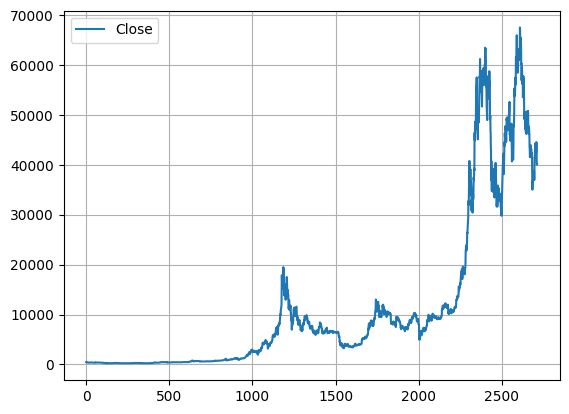

In [25]:
# Ploting

dataset[['Close']].plot(grid=True)
plt.show()

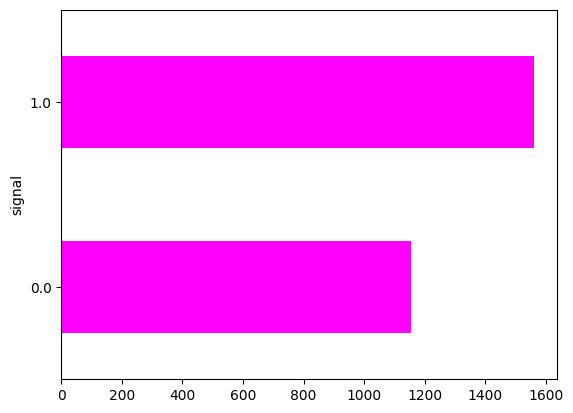

In [26]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='magenta')
plt.show()

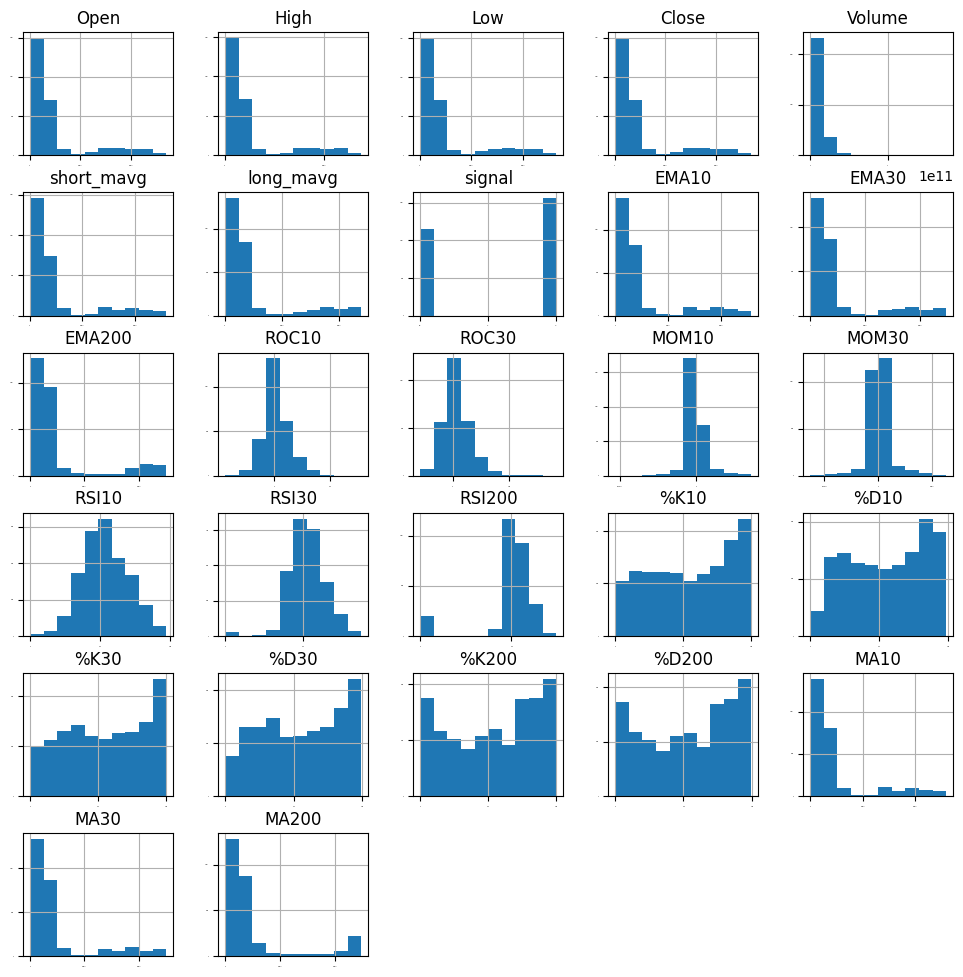

In [27]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

## Correlation
Plotting the correlation matrix of the processed dataset.

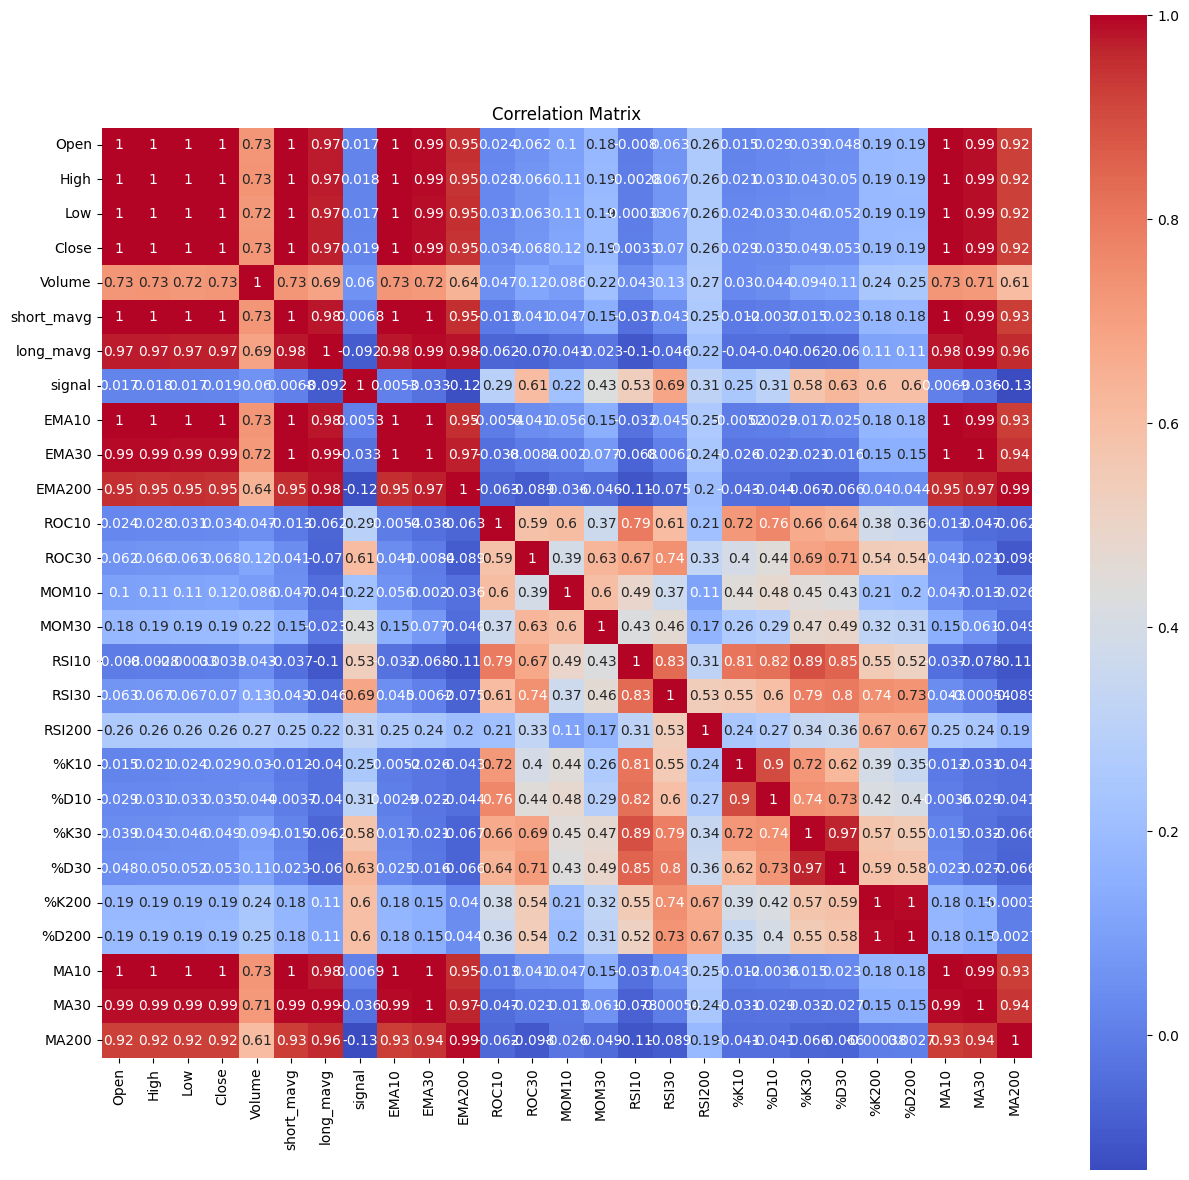

In [28]:
# Correlation
correlation = dataset.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

Blue indicates that it's less correlated,
Red indicates that these two feature mapped together are highly correlated.

There are a lot of chunks that are highly correlated, which makes no sence to have some additional features that are correlated to one other, which might not actually make the signal accurate.

Because it's inputing data that does not hold much predictive value as an individual feature.

So we can drop some of highly correlated features to reduce the dimensionality.

In [29]:
# dataset = dataset.drop(columns=['Open', 'High', 'Low', 'short_mavg', 'long_mavg'], axis=1)

In [30]:
dataset = dataset.drop(columns='Date')
dataset.sample(10)

,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA10,MA30,MA200
2681,42374.039063,42478.304688,41242.914063,41744.328125,23091543258,42685.927735,48665.485026,0.0,42741.365815,45012.376067,...,49.681043,43.458776,51.919024,16.018064,19.136348,31.407027,32.368702,42685.927735,45491.672266,48640.424688
2555,47098.000000,48450.468750,46773.328125,48176.347656,30484496466,46830.802734,43931.106836,1.0,47005.253881,46788.404830,...,52.986448,51.116797,36.147182,51.116797,36.147182,53.608583,49.626383,46830.802734,47871.816016,45921.771231
422,338.497986,340.914001,326.075012,336.752991,52003000,363.530200,277.623084,1.0,347.403522,323.501841,...,50.430007,18.377396,14.219410,34.784977,32.568629,46.347399,43.614250,363.530200,317.652601,257.800565
2596,63032.761719,63229.027344,59991.160156,60363.792969,34878965587,62246.503125,51014.630990,1.0,61190.595304,56812.196769,...,54.689597,15.443424,35.240361,74.841319,78.983061,82.736185,85.578237,62246.503125,55311.877995,45301.426367
1184,16384.599609,17085.800781,16185.900391,16564.000000,13777399808,15863.530078,8869.017147,1.0,15506.575203,12299.950863,...,68.382363,73.485654,78.071323,84.730307,86.958022,89.161961,90.566330,15863.530078,11377.583317,5051.917395
740,600.807007,608.143005,600.348999,608.043030,59153800,604.117999,594.216635,1.0,604.232873,602.631670,...,53.552440,80.925804,52.967030,64.834690,58.269475,54.297273,53.164651,604.117999,601.671031,548.035969
2458,37389.515625,38334.324219,35847.593750,36702.597656,43576032854,36285.867188,47901.554362,0.0,36239.595923,40039.861046,...,51.188200,66.807912,56.496722,22.089408,18.738248,41.951551,40.173683,36285.867188,39227.673568,42127.013330
3,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1136,5899.740234,5988.390137,5728.819824,5780.899902,1710130048,5824.416992,4624.152490,1.0,5752.759166,5263.202711,...,60.480819,60.325462,63.322921,80.795049,83.046241,91.783568,92.404330,5824.416992,5144.428662,3122.806546
144,227.692993,229.438004,221.076996,223.412003,17145200,225.375401,273.483783,0.0,227.143366,241.078219,...,0.000000,33.577878,32.916812,37.644520,38.417205,0.000000,0.000000,225.375401,230.626966,0.000000


# Model Train Testing

In [31]:
# Load libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
# split out validation dataset for the end
# subset_dataset= dataset.iloc[-2000:]
# Y = subset_dataset["signal"]
Y = dataset["signal"]
# X = subset_dataset.loc[:, dataset.columns != 'signal']
X = dataset.loc[:, dataset.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [33]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'

In [34]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Neural Network
models.append(('NN', MLPClassifier()))

# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RFC', RandomForestClassifier(n_jobs=-1)))

In [35]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)  # Cross validation
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.567742 (0.028690)
LDA: 0.894931 (0.021888)
KNN: 0.643318 (0.044450)
CART: 0.927189 (0.007656)
NB: 0.597235 (0.059488)
NN: 0.514747 (0.072074)
AB: 0.950230 (0.017463)
GBM: 0.958525 (0.009666)
RFC: 0.960369 (0.009489)


# Comparing the Algorithms

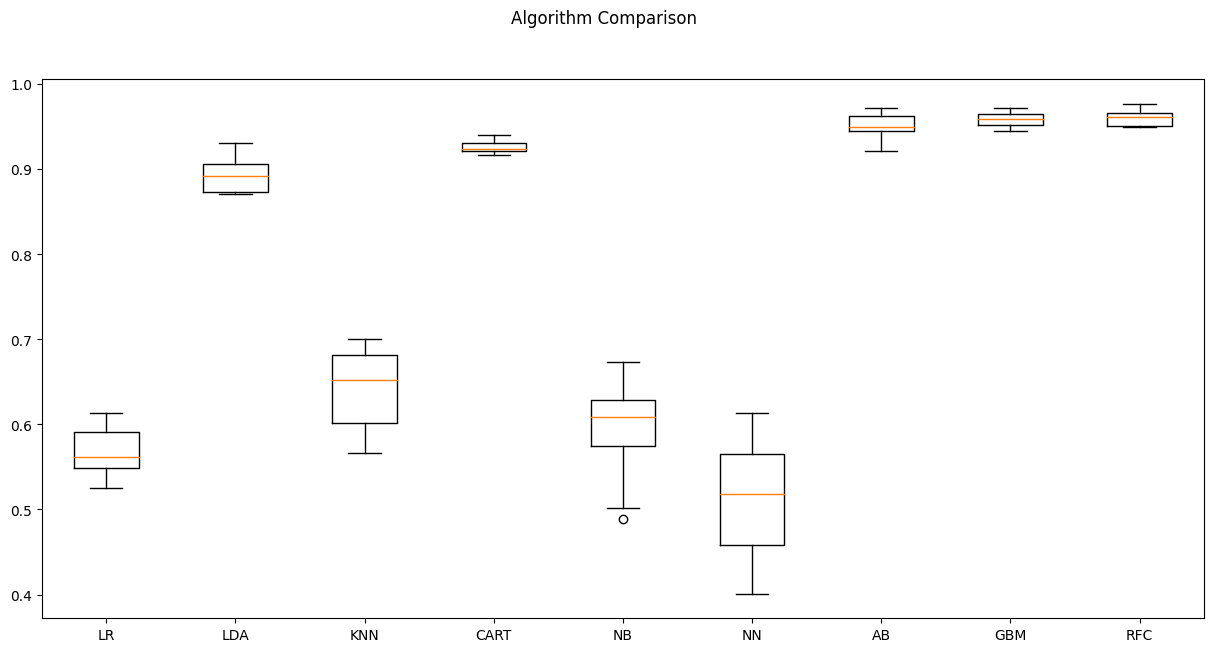

In [36]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,7)
plt.show()

# Choosing the best parameters for Random Forest Classifier

In [37]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform.
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators.
    The maximum depth limits the number of nodes in the tree.
    Tune this parameter for best performance; the best value depends on the interaction of the input variables
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split.
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

'''
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80,100]
max_depth= [3,5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.959908 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
#16 0.900922 (0.015729) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}
#14 0.904608 (0.013678) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 80}
#13 0.905069 (0.013388) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
#10 0.932719 (0.010346) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#9 0.933180 (0.012911) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#8 0.934101 (0.013985) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
#6 0.952074 (0.012738) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#4 0.957143 (0.006533) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#2 0.958525 (0.009444) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
#18 0.897696 (0.011060) with: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 20}
#15 0.903226 (0.012536) with: {'

# Model Performence

In [38]:
# Prepare model
model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80, n_jobs=-1)

model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80,
                       n_jobs=-1)

In [39]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9558011049723757
[[203  13]
 [ 11 316]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       216
         1.0       0.96      0.97      0.96       327

    accuracy                           0.96       543
   macro avg       0.95      0.95      0.95       543
weighted avg       0.96      0.96      0.96       543



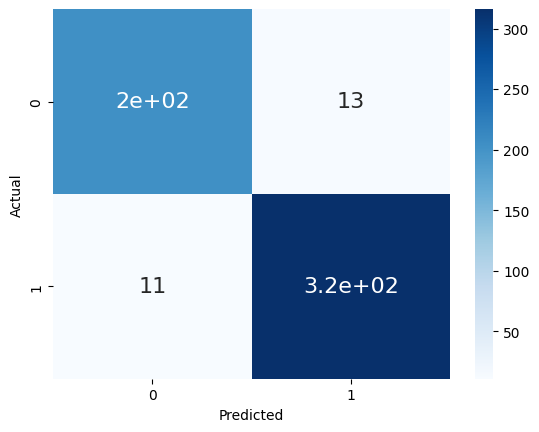

In [40]:
# Plotting the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={'size':16})
plt.show()

## Feature Importance

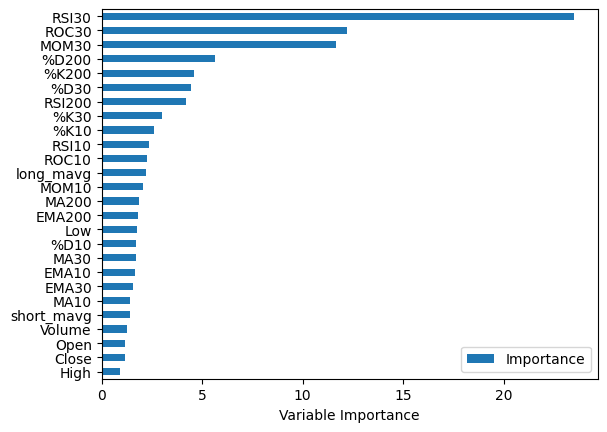

In [41]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh')
plt.xlabel('Variable Importance')
plt.show()

***

# Quantum Counterpart of the proceeded Problem

In [42]:
!pip install qiskit-machine-learning

In [43]:
!pip install pylatexenc
!pip install qiskit[visualization]

In [44]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Initialize an array to store evaluations of the objective function during optimization
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# Define a callback function for visualization of the optimization process
def callback_graph(weights, obj_func_eval):
    # Updates and saves a plot of the objective function value after each iteration."""
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    # plt.savefig('Objective_function_value_against_iteration.png')  # Save plot to file
    plt.show()

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Separate the dataset into features (X) and target label (Y)
Y = dataset["signal"]   # Target label: signal
X = dataset.loc[:, dataset.columns != 'signal']   # Features: all other columns

# Convert the signal float labels into integer values to be used by machine learning models
Y = label_encoder.fit_transform(Y)

# Normalize the range of features' values in range [0,1]
X = MinMaxScaler().fit_transform(X)

# # Specify the No. of important features to work on
# Feature = PCA(n_components=2).fit_transform(X)

# split out validation dataset for the end
# subset_dataset= dataset.iloc[-2000:]

validation_size = 0.2
seed = 42
# X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

In [46]:
# Define the feature dimension
feature_dim = X_train.shape[1]
print(feature_dim)
print(X_train.shape)
print(Y_train.shape)
print(Y)
print(X)

26
(2170, 26)
(2170,)
[0 0 0 ... 1 0 0]
[[0.00428907 0.00373944 0.00424271 ... 0.         0.         0.        ]
 [0.00415543 0.00357446 0.00364887 ... 0.         0.         0.        ]
 [0.00366922 0.00315122 0.00321734 ... 0.         0.         0.        ]
 ...
 [0.64952249 0.64045772 0.60530927 ... 0.66544347 0.63844805 0.99971653]
 [0.59928062 0.59373975 0.59606975 ... 0.65912579 0.63753852 0.99980038]
 [0.59141395 0.58377845 0.60170706 ... 0.65261506 0.63724444 1.        ]]


# First check the results of Classical Support Vector Classifier SVC

In [47]:
from sklearn.svm import SVC

svc = SVC()

# Specify the No. of important features to work on
Feature = PCA(n_components=2).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

# Fit the molel
svc.fit(X_train, Y_train)

# Using only 2 featues
train_score_c2 = svc.score(X_train, Y_train)
test_score_c2 = svc.score(X_validation, Y_validation)

print(f"Classical SVC on the training dateset: {train_score_c2:.4f}")
print(f"Classical SVC on the validation dateset: {test_score_c2:.4f}")



Classical SVC on the training dateset: 0.7848
Classical SVC on the validation dateset: 0.7808


In [48]:
# Specify the No. of important features to work on
Feature = PCA(n_components=4).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

# Fit the molel
svc.fit(X_train, Y_train)

# Using only 4 featues
train_score_c4 = svc.score(X_train, Y_train)
test_score_c4 = svc.score(X_validation, Y_validation)

print(f"Classical SVC on the training dateset: {train_score_c4:.4f}")
print(f"Classical SVC on the validation dateset: {test_score_c4:.4f}")



Classical SVC on the training dateset: 0.8604
Classical SVC on the validation dateset: 0.8508


In [49]:
# Specify the No. of important features to work on
Feature = PCA(n_components=26).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

# Fit the molel
svc.fit(X_train, Y_train)

# Using only all featues: 26
train_score_c26 = svc.score(X_train, Y_train)
test_score_c26 = svc.score(X_validation, Y_validation)

print(f"Classical SVC on the training dateset: {train_score_c26:.4f}")
print(f"Classical SVC on the validation dateset: {test_score_c26:.4f}")

Classical SVC on the training dateset: 0.9166
Classical SVC on the validation dateset: 0.9006


# Second chech the results of Quantum Counterpart using the Variational Quantum Classifier VQC

### First reduce the No. of features to 2:

In [50]:
# Import predefined feature maps
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2

# Setup a local simulator for quantum computation
from qiskit.primitives import Sampler
sampler = Sampler()

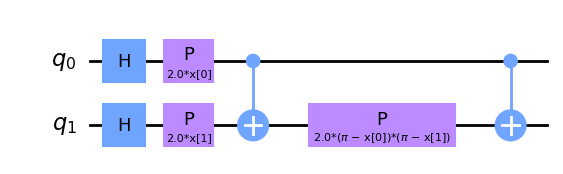

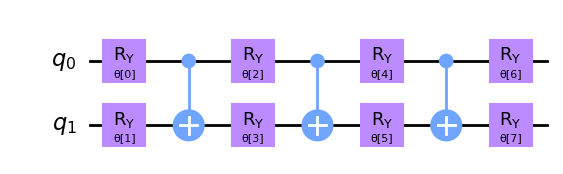

In [51]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Specify the No. of important features to work on: 2
Feature = PCA(n_components=2).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = RealAmplitudes(feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

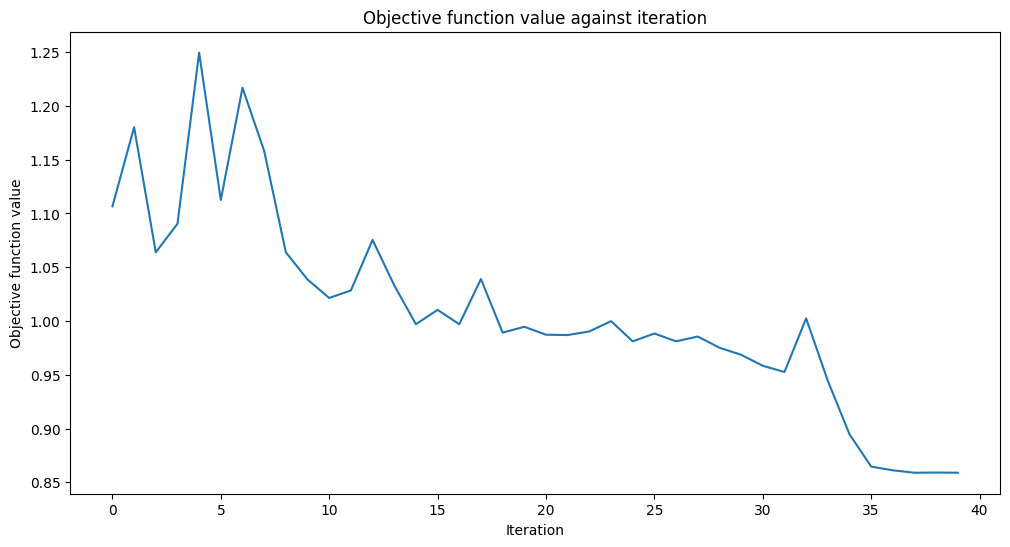

Training time: 275 seconds


In [52]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
import time
optimizer = COBYLA(maxiter=40)
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [53]:
# print the scores for 2 qubits and RealAmplitude Ansatz
train_score_q2_ra = vqc.score(X_train, Y_train)
test_score_q2_ra = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.4f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.4f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.6945
Quantum VQC on the test dataset using RealAmplitudes:     0.6538


## Increase the No. of feature to 4

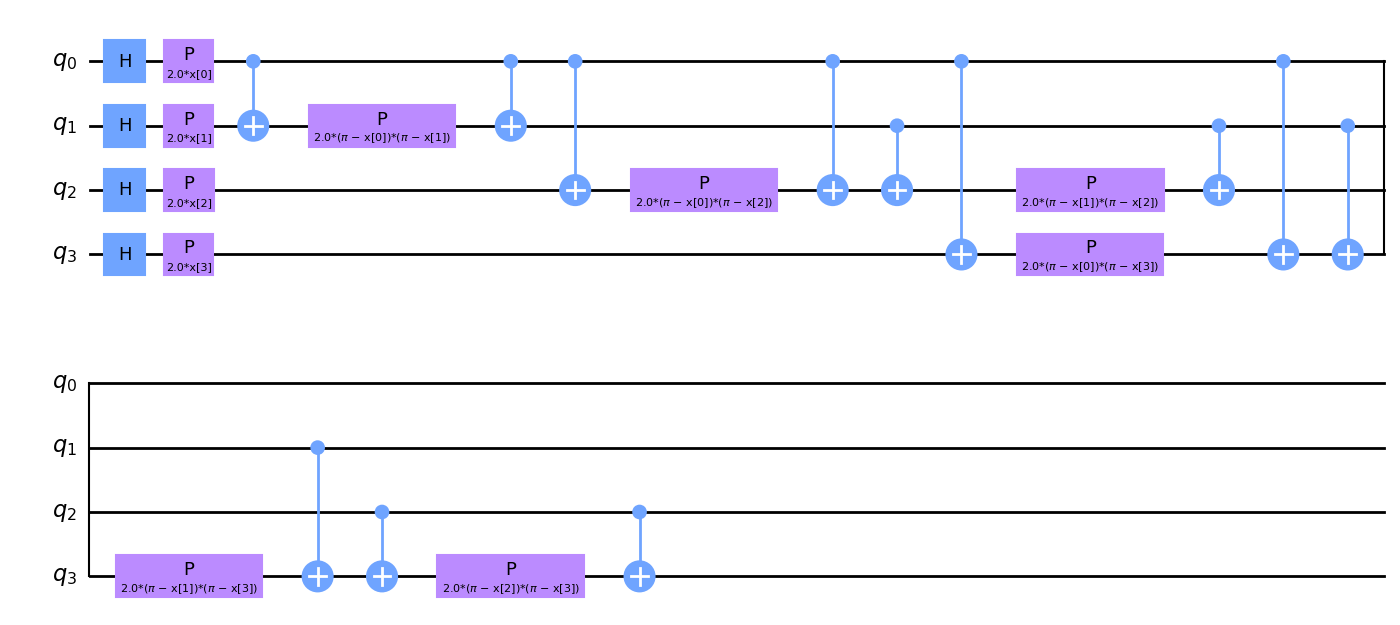

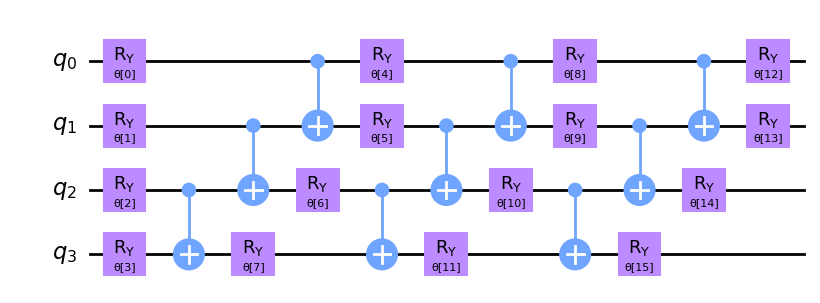

In [54]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Specify the No. of important features to work on: 4
Feature = PCA(n_components=4).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = RealAmplitudes(feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

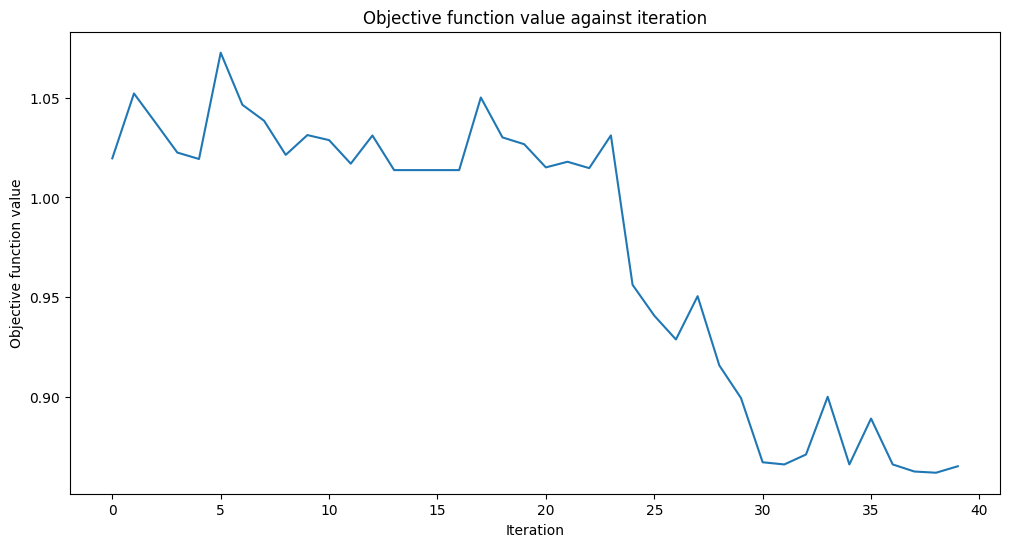

Training time: 518 seconds


In [55]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
import time

optimizer = COBYLA(maxiter=40)
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [56]:
# print the scores for 4 qubits and RealAmplitude Ansatz
train_score_q4_ra = vqc.score(X_train, Y_train)
test_score_q4_ra = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q4_ra:.4f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q4_ra:.4f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.7009
Quantum VQC on the test dataset using RealAmplitudes:     0.6888


## Increase the No. of features to 6:

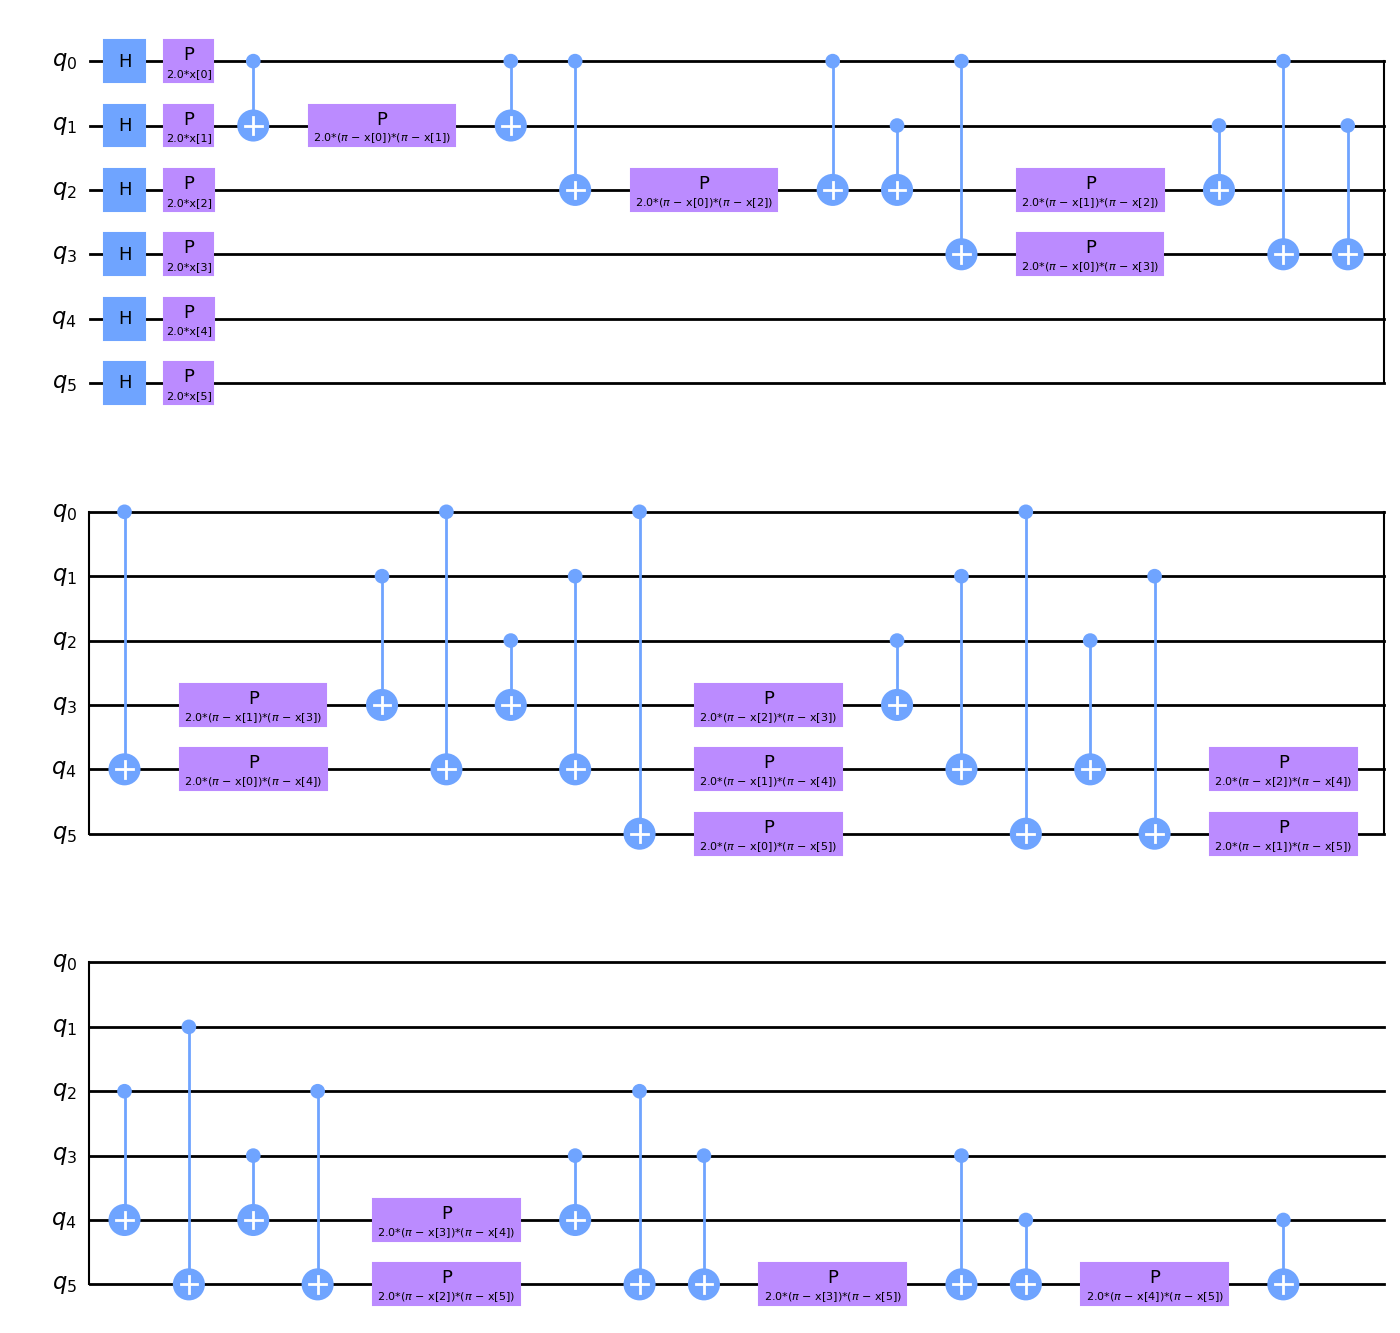

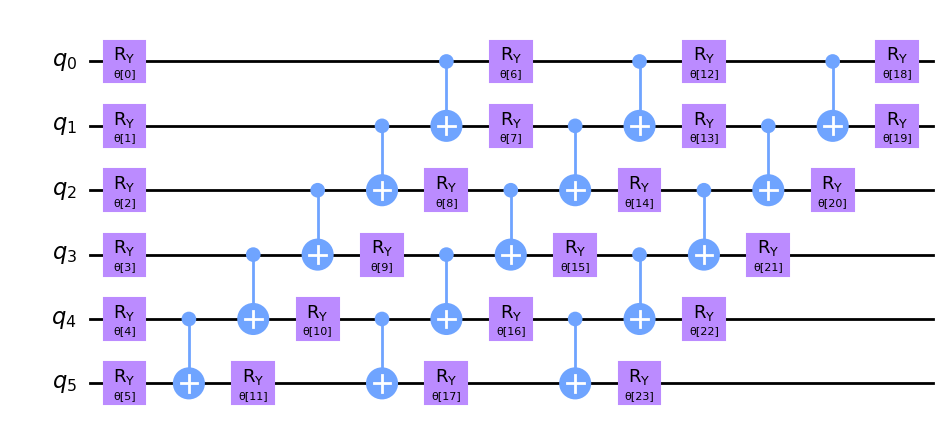

In [57]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Specify the No. of important features to work on: 6
Feature = PCA(n_components=6).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = RealAmplitudes(feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

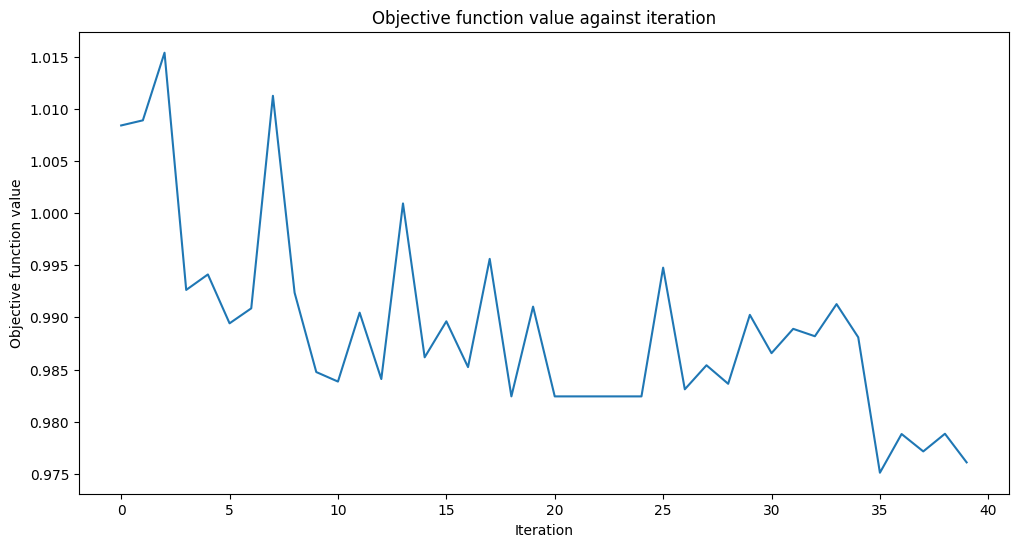

Training time: 915 seconds


In [58]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
import time

optimizer = COBYLA(maxiter=40)
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [59]:
# print the scores for 6 qubits and RealAmplitude Ansatz
train_score_q6_ra = vqc.score(X_train, Y_train)
test_score_q6_ra = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q6_ra:.4f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q6_ra:.4f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.6041
Quantum VQC on the test dataset using RealAmplitudes:     0.5856


***

## Use different ansatz: EfficientSU2

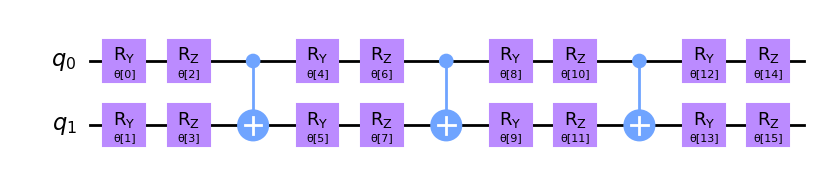

In [79]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2

# Specify the No. of important features to work on: 2
Feature = PCA(n_components=2).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = EfficientSU2(num_qubits=feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
# display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

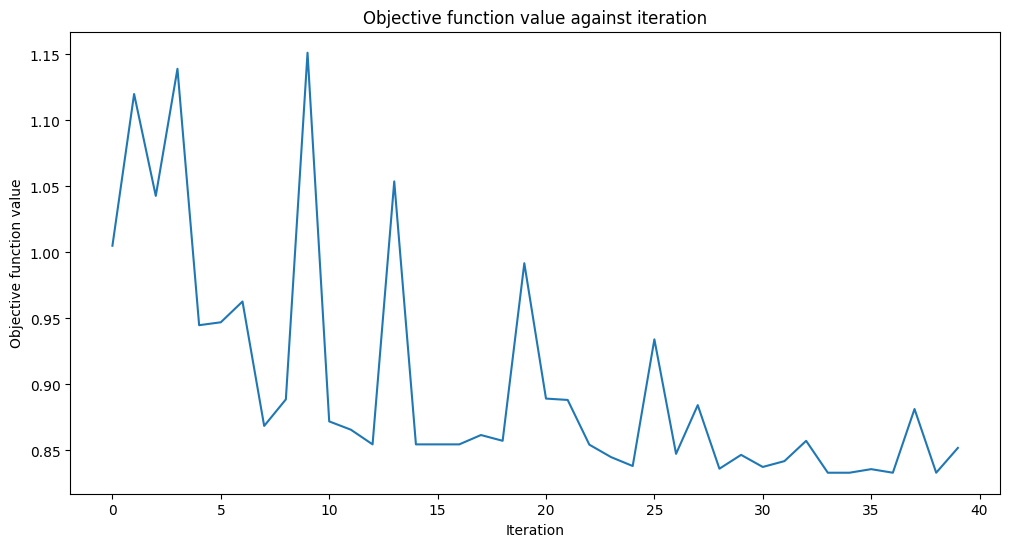

Training time: 350 seconds


In [69]:
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [71]:
# print the scores for 2 qubits and EfficientSU2
train_score_q2_eff = vqc.score(X_train, Y_train)
test_score_q2_eff = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.4f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.4f}")

Quantum VQC on the training dataset using EfficientSU2: 0.7106
Quantum VQC on the test dataset using EfficientSU2:     0.7182


## Increase the No. of Features to 4 and use the EfficientSU2 ansatz

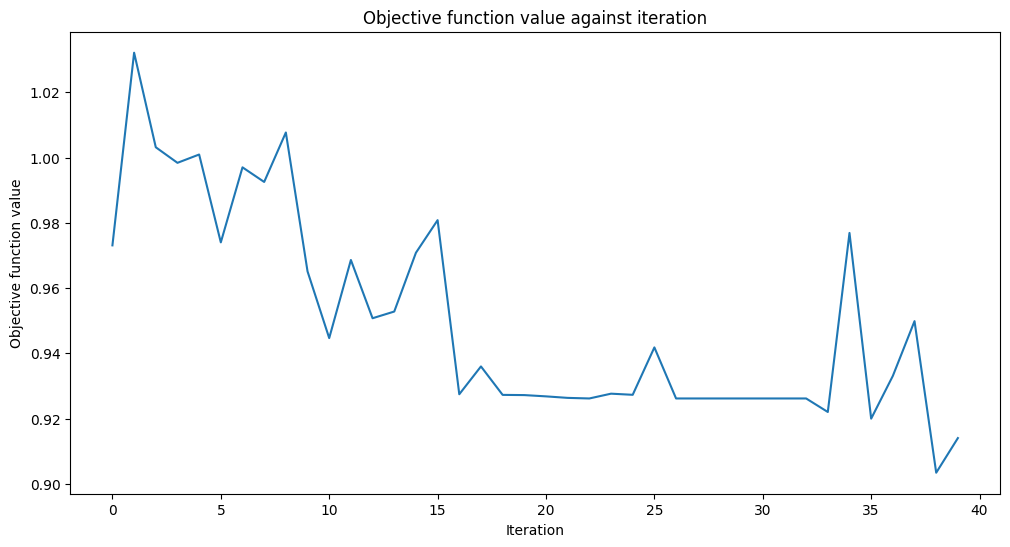

Training time: 668 seconds


In [62]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2

# Specify the No. of important features to work on: 4
Feature = PCA(n_components=4).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = EfficientSU2(num_qubits=feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
# display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [63]:
# print the scores for 4 qubits and EfficientSU2
train_score_q4_eff = vqc.score(X_train, Y_train)
test_score_q4_eff = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q4_eff:.4f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q4_eff:.4f}")

Quantum VQC on the training dataset using EfficientSU2: 0.6594
Quantum VQC on the test dataset using EfficientSU2:     0.6667


## Increase the No. of Features to 6 and use the EfficientSU2 ansatz

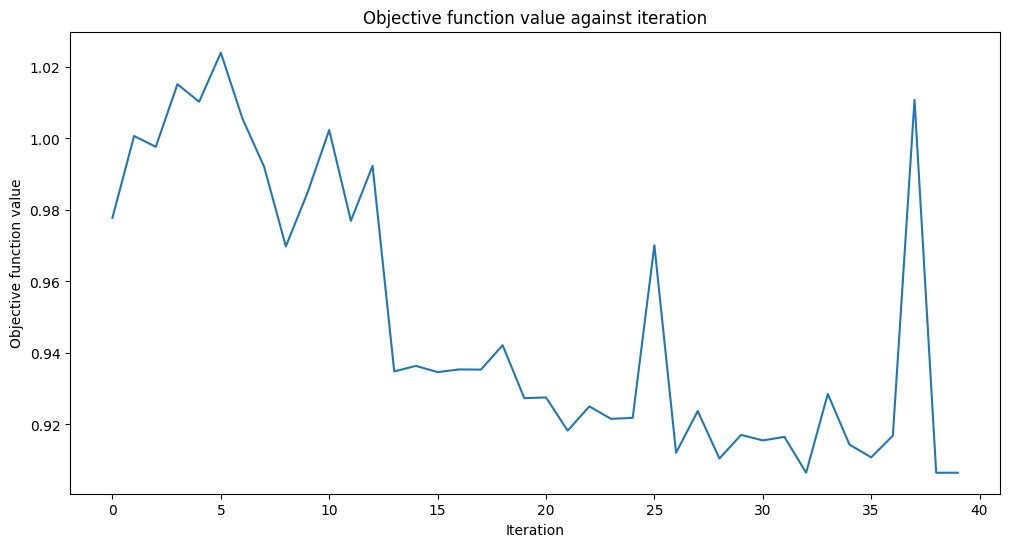

Training time: 1145 seconds


In [64]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2

# Specify the No. of important features to work on: 6
Feature = PCA(n_components=6).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = EfficientSU2(num_qubits=feature_dim, reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
# display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [67]:
# print the scores for 6 qubits and EfficientSU2
train_score_q6_eff = vqc.score(X_train, Y_train)
test_score_q6_eff = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q6_eff:.4f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q6_eff:.4f}")

Quantum VQC on the training dataset using EfficientSU2: 0.6820
Quantum VQC on the test dataset using EfficientSU2:     0.7274


***

## Use different ansatz: TwoLocal

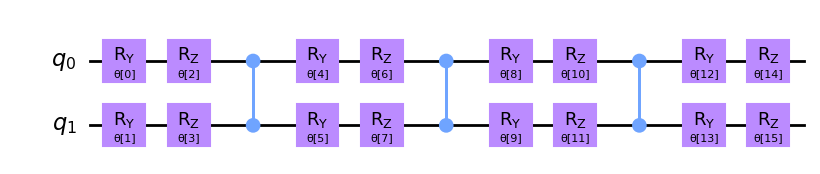

In [78]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap,TwoLocal

# Specify the No. of important features to work on: 6
Feature = PCA(n_components=2).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
# display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

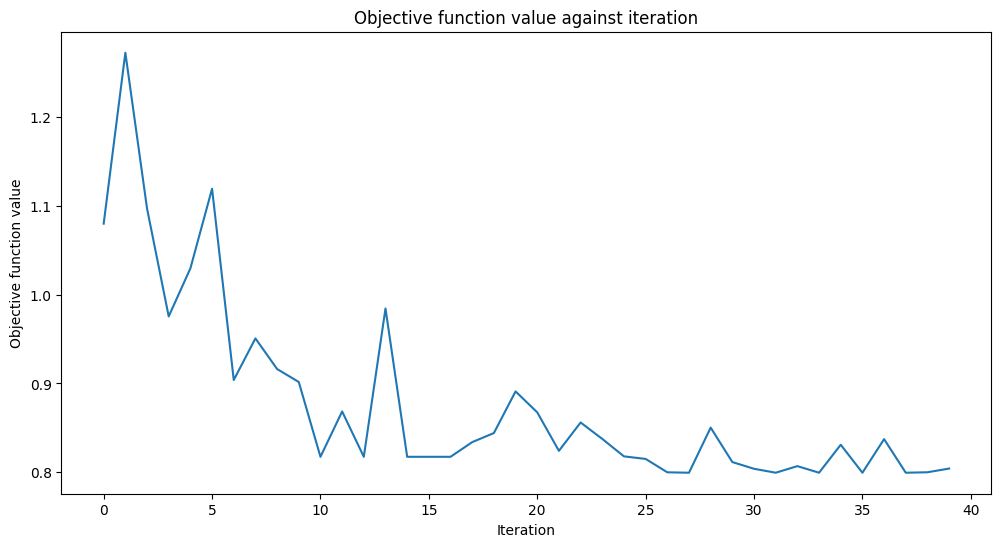

Training time: 441 seconds


In [73]:
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [74]:
# print the scores for 2 qubits and TwoLocal
train_score_q2_tl = vqc.score(X_train, Y_train)
test_score_q2_tl = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_tl:.4f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_tl:.4f}")

Quantum VQC on the training dataset using EfficientSU2: 0.7111
Quantum VQC on the test dataset using EfficientSU2:     0.6943


## Increase the No. of features to 4

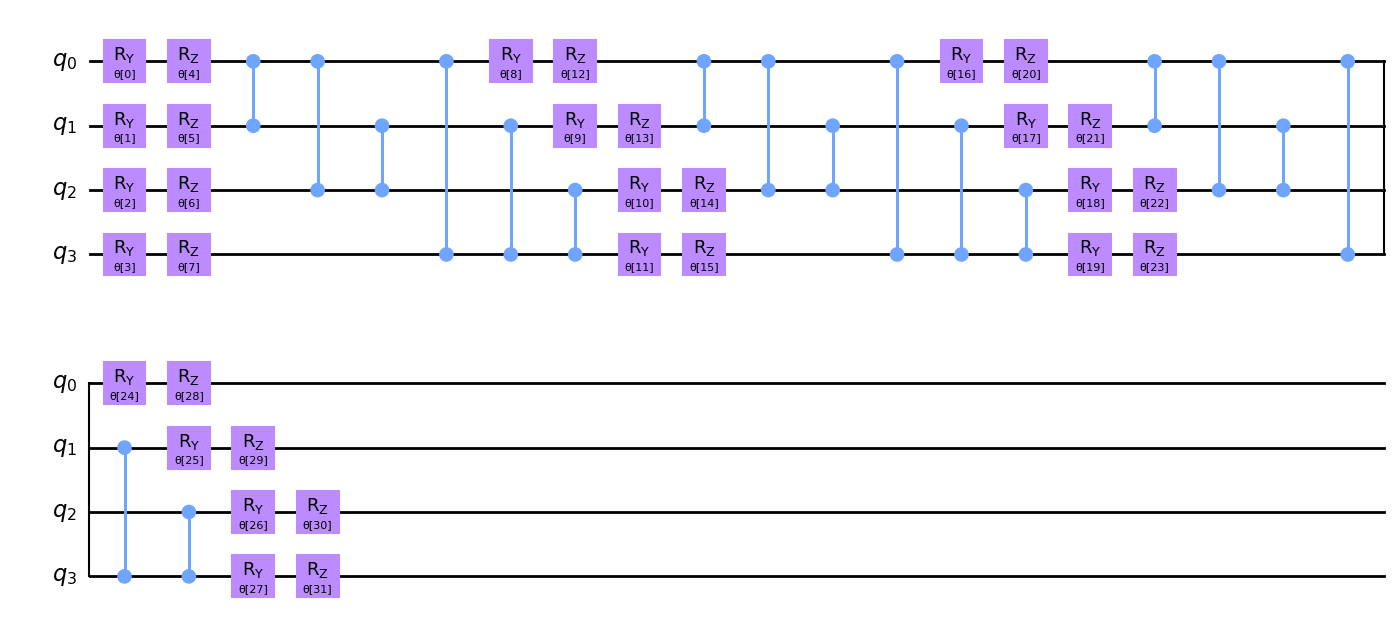

In [83]:
# Constructing the quantum feature map and ansatz for the quantum circuit
from qiskit.circuit.library import ZZFeatureMap,TwoLocal

# Specify the No. of important features to work on: 6
Feature = PCA(n_components=4).fit_transform(X)

# Split the train and test data
X_train, X_validation, Y_train, Y_validation = train_test_split(Feature, Y, test_size=validation_size, random_state=seed)

# Define the feature dimension
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dim, reps=1) # Quantum circuit feature map
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)  # Quantum circuit ansatz

# Display the feature map and the ansatz
# display(feature_map.decompose().draw(output="mpl", style="clifford", fold=20))
display(ansatz.decompose().draw(output="mpl", style="clifford", fold=20))

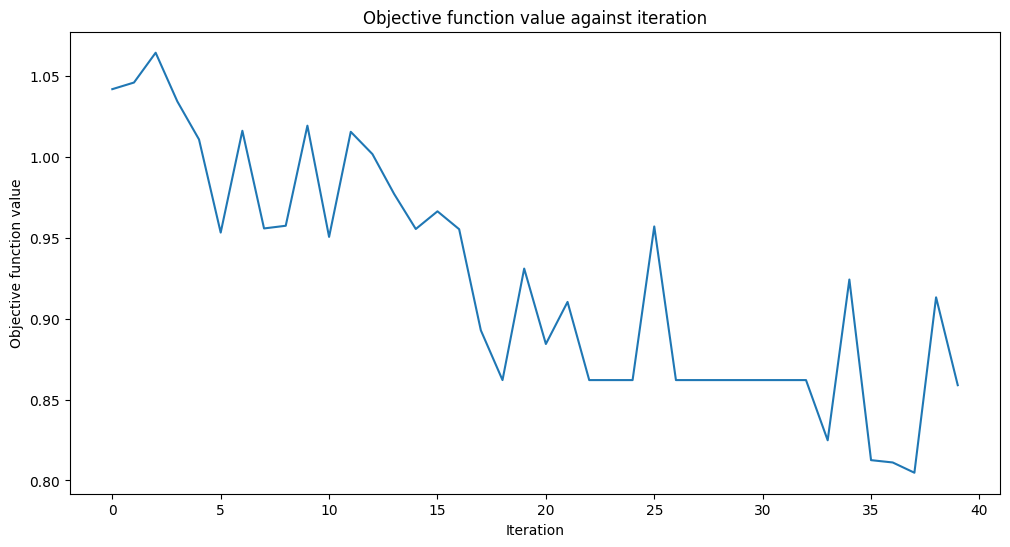

Training time: 762 seconds


In [77]:
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [84]:
# print the scores for 4 qubits and TwoLocal
train_score_q4_tl = vqc.score(X_train, Y_train)
test_score_q4_tl = vqc.score(X_validation, Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q4_tl:.4f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q4_tl:.4f}")

Quantum VQC on the training dataset using EfficientSU2: 0.7005
Quantum VQC on the test dataset using EfficientSU2:     0.7164


# Conclusion

In [85]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")
print(f"VQC, 2 features, TwoLocal       | {train_score_q2_tl:10.2f} | {test_score_q2_tl:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4_ra:10.2f} | {test_score_q4_ra:10.2f}")
print(f"VQC, 4 features, EfficientSU2   | {train_score_q4_eff:10.2f} | {test_score_q4_eff:10.2f}")
print(f"VQC, 4 features, TwoLocal       | {train_score_q4_tl:10.2f} | {test_score_q4_tl:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 26 features                | {train_score_c26:10.2f} | {test_score_c26:10.2f}")
print(f"VQC, 6 features, RealAmplitudes | {train_score_q6_ra:10.2f} | {test_score_q6_ra:10.2f}")
print(f"VQC, 6 features, EfficientSU2   | {train_score_q6_eff:10.2f} | {test_score_q6_eff:10.2f}")
print(f"----------------------------------------------------------")


Model                           | Test Score | Train Score
SVC, 2 features                 |       0.78 |       0.78
VQC, 2 features, RealAmplitudes |       0.69 |       0.65
VQC, 2 features, EfficientSU2   |       0.71 |       0.72
VQC, 2 features, TwoLocal       |       0.71 |       0.69
----------------------------------------------------------
SVC, 4 features                 |       0.86 |       0.85
VQC, 4 features, RealAmplitudes |       0.70 |       0.69
VQC, 4 features, EfficientSU2   |       0.66 |       0.67
VQC, 4 features, TwoLocal       |       0.70 |       0.72
----------------------------------------------------------
SVC, 26 features                |       0.92 |       0.90
VQC, 6 features, RealAmplitudes |       0.60 |       0.59
VQC, 6 features, EfficientSU2   |       0.68 |       0.73
----------------------------------------------------------


### Comment:
The classical models perform better than their quantum counterparts, may be we can modify some of the parameter of the Variational Quantum Circuit to improve the learning models.

When we increased the number of features, the performance of all models went down which is not as expected.

 Changing the type of the ansatz here didn't give us a significant imporvemnet in training the model.

***